# **CS 181 HW4 Problem 1**
---

#### Initialize data and parameters

Consider a specific example of when we have $K = 3$ component Gamma distributions. Let's initialize the initial parameter values for $\theta$ and $\beta_k$ as follows:
$$
\begin{align*}
  \theta_k &=  1/K, \\
  \beta_k & = k/K.
\end{align*}
$$

Note that we usually initialize $\theta$ and $\beta_k$ randomly. However, by fixing the initial $\theta$ and $\beta_k$, EM becomes deterministic which makes debugging (and grading) easier.



In [222]:
import torch
import torch.distributions as ds
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

x = torch.load('data.pt')

K = 3
theta = torch.ones(K) / K
alpha = 5.0
betas = (torch.arange(K) + 1) / K

In [223]:
import numpy as np
from scipy.stats import gamma
x = x.numpy()
theta = theta.numpy()
betas = betas.numpy()

In [224]:
from scipy.special import logsumexp

#### **Todo:** implement the E-step (Use expression derived in part 3)

In [241]:
# Expectation step: find q as the posterior of the latent variables given the data
def e_step(theta, betas):
    # Use the log of the PDF for numerical stability
    logq = gamma.logpdf(x, alpha, scale=(1 / betas)) + np.log(theta)
    # Normalize each element of q and return the exponential
    logq -= logsumexp(logq, axis=1).reshape(-1, 1)
    return np.exp(logq)

#### **Todo:** implement the M-step (Use expressions derived in parts 4b and 4c)

In [242]:
# Maximization step: find optimal theta, betas given q
def m_step(q):
    # Apply the formulas from part (4)
    theta_hat = np.sum(q, axis=0) / N
    beta_hats = alpha * np.sum(q, axis=0) / np.sum(x * q, axis=0)
    return theta_hat, beta_hats

Log Likelihood Implemented Below

In [243]:
def log_px(x, theta, betas):
    log_pxs = gamma.logpdf(x, alpha, scale=1 / betas) + np.log(theta)
    return logsumexp(log_pxs, axis=1)

def log_likelihood(theta, betas):
    return log_px(x, theta, betas).sum()

#### **Todo:** implement EM algorithm

In [244]:
# EM algorithm
def run_em(theta, betas, iterations=1000):
    # Iterate for given number of iterations, alternately finding q and then theta, betas
    for i in range(iterations):
        q = e_step(theta, betas)
        theta, betas = m_step(q)
    return theta, betas

#### Plot

In [245]:
def make_plot(theta, betas):
    x_test = torch.linspace(0.01, x.max(), 1000)
    # prob = log_px(x_test.unsqueeze(-1), theta, betas).exp()
    prob = np.exp(log_px(x_test.unsqueeze(-1), theta, betas))  # use this line for numpy
    ll = log_likelihood(theta, betas)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
    
    fig.subplots_adjust(top=0.7)
    fig.suptitle(f'theta = {theta}\nbeta = {betas}\nlog likelihood = {ll:.3e}')

    ax1.set_title('Dataset')
    # ax1.hist(x.T, bins=100, color='tomato')
    ax1.hist(x, bins=100, color='tomato')  # use this line for numpy
    ax2.set_title('Gamma mixture')
    ax2.plot(x_test, prob, color='tomato')
    plt.savefig('p1.pdf', bbox_inches='tight')

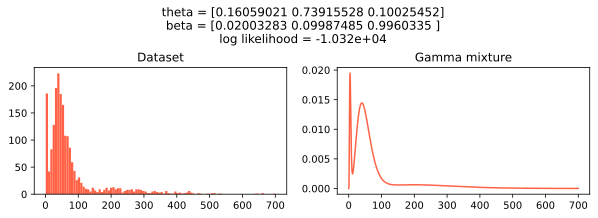

In [246]:
theta, betas = run_em(theta, betas)
make_plot(theta, betas)